
<a href="https://colab.research.google.com/drive/1gc1UqNWjjAHv-T4fGGWvE9GC4YtqXkid?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

In [ ]:
# Install nlpaug and transformers silently
!pip install -q nlpaug transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 13.0 MB/s eta 0:00:00


In [ ]:
# Import modules
import nlpaug.augmenter.word as naw
import random
import matplotlib.pyplot as plt


In [ ]:
# Sample text examples
sample_texts = [
    "The movie was fantastic and had a great storyline.",
    "I absolutely loved the performance of the lead actor.",
    "The plot was dull and predictable.",
    "This was a waste of time, I wouldn’t recommend it.",
    "Cinematography and music were top notch."
]


In [ ]:
# Create augmenters
swap_augmenter = naw.RandomWordAug(action="swap")
delete_augmenter = naw.RandomWordAug(action="delete")
bert_augmenter = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Show original and augmented versions
print("Comparing Original vs Augmented Texts (Swap / Delete / BERT Substitute):\n")
for sentence in sample_texts:
    print(f"Original:   {sentence}")
    print(f"Swap Aug:   {swap_augmenter.augment(sentence)}")
    print(f"Delete Aug: {delete_augmenter.augment(sentence)}")
    print(f"BERT Aug:   {bert_augmenter.augment(sentence)}")
    print("-" * 50)


Comparing Original vs Augmented Texts (Swap / Delete / BERT Substitute):

Original:   The movie was fantastic and had a great storyline.
Swap Aug:   ['The was movie fantastic and had great storyline a.']
Delete Aug: ['The fantastic and a great storyline.']
BERT Aug:   ['the work was good and had a great story.']
--------------------------------------------------
Original:   I absolutely loved the performance of the lead actor.
Swap Aug:   ['I absolutely loved the performance of the actor lead.']
Delete Aug: ['I performance of the lead actor.']
BERT Aug:   ['i just loved that performance of that lead actor.']
--------------------------------------------------
Original:   The plot was dull and predictable.
Swap Aug:   ['Plot the dull was predictable and.']
Delete Aug: ['Plot was dull.']
BERT Aug:   ['the plot being simple and tragic.']
--------------------------------------------------
Original:   This was a waste of time, I wouldn’t recommend it.
Swap Aug:   ['This was a of waste time, 

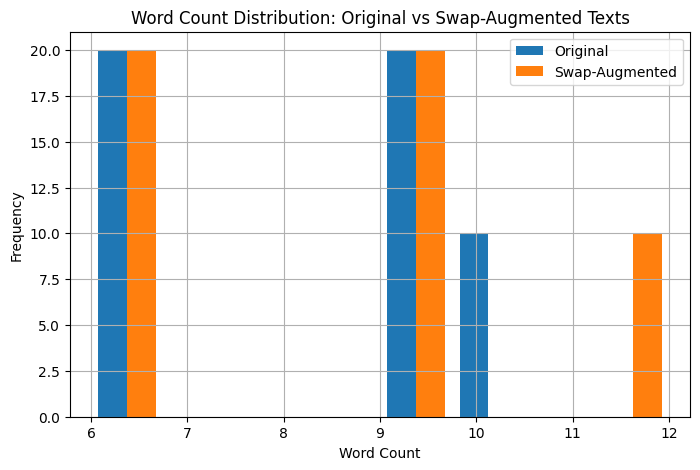

In [ ]:
# Compare word counts before and after swap augmentation
original_lengths = []
swap_lengths = []
num_samples = 50

for _ in range(num_samples):
    idx = random.randint(0, len(sample_texts) - 1)
    original = sample_texts[idx].split()

    augmented_text = swap_augmenter.augment(sample_texts[idx])
    if isinstance(augmented_text, list):
        augmented_text = augmented_text[0]
    augmented = augmented_text.split()

    original_lengths.append(len(original))
    swap_lengths.append(len(augmented))

# Plot histograms
plt.figure(figsize=(8, 5))
plt.hist([original_lengths, swap_lengths], bins=8, label=["Original", "Swap-Augmented"])
plt.title("Word Count Distribution: Original vs Swap-Augmented Texts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
